In [1]:
import pandas as pd 
import json 
import os
import random
from tqdm import tqdm 
import pickle 
from collections import defaultdict
from collections import Counter
from functions import *
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt 
from collections import Counter

In [3]:
"""
Renaming the columns dataset
"""
df = pd.read_csv("wikigraph_reduced.csv", sep='\t') 
df.columns = ["Edges",'Source', 'Target']

In [5]:
df.head(5)

Edges  Source   Target
0    796      95  1185516
1    909     108  1059989
2    910     108  1062426
3    911     108  1161925
4   1141     134   541222

In [4]:
"""
save renamed dataset into a csv file
"""
df.to_csv('data/dataset.csv', index=False)

In [6]:
"""
Takink as input the file wiki-topcats-page-names.txt, return a Dictionary with key the number of 
the page and as value the name of the page. 
"""
# keys: number of the page (article)
# values: name of the page (article)
p = open("wiki-topcats-page-names.txt", "r")
pages = {}
for pag in tqdm(p): 
    list_ = pag.split()[1:]
    aux = ' '.join(list_)
    pages[int(pag.split()[0])] = aux


1791489it [00:04, 434584.70it/s]


In [7]:
write_pickle('data/pages.pkl', pages)


In [8]:
pages  = read_pickle('data/pages.pkl')

In [9]:
pages

{0: 'Chiasmal syndrome',
 1: 'Kleroterion',
 2: 'Pinakion',
 3: 'LyndonHochschildSerre spectral sequence',
 4: "Zariski's main theorem",
 5: 'FultonHansen connectedness theorem',
 6: "Cayley's ruled cubic surface",
 7: 'Annulus theorem',
 8: "Bing's recognition theorem",
 9: 'BochnerMartinelli formula',
 10: 'BergmanWeil formula',
 11: 'Menallen Township, Pennsylvania',
 12: 'Missouri Route 117',
 13: 'Jadwin, Missouri',
 14: 'Gladden, Missouri',
 15: 'Missouri Route 119',
 16: 'Missouri Route 68',
 17: 'Sligo, Missouri',
 18: 'Lower Parker School',
 19: 'Lecoma, Missouri',
 20: 'Doss, Missouri',
 21: 'Boss, Missouri',
 22: 'Vulcan, Missouri',
 23: 'Glover, Missouri',
 24: 'Missouri Route 114',
 25: 'Missouri Route 12',
 26: 'Missouri Route 80',
 27: 'Missouri Route 75',
 28: 'Missouri Route 91',
 29: 'Missouri Route 147',
 30: 'Missouri Route 149',
 31: 'Goldsberry, Missouri',
 32: 'Missouri Route 162',
 33: 'Missouri Route 172',
 34: 'Missouri Route 245',
 35: 'Missouri Route 273',
 

In [10]:
"""
"""
cat = open("wiki-topcats-categories.txt", "r")
categories = {}
for i in tqdm(cat): 
    category = i.split()[0][9:-1]
    page_in_cat = list(map(int, i.split()[1:])) 
    categories[category] = page_in_cat


17364it [00:02, 8268.90it/s] 


In [11]:
write_pickle('data/categories.pkl', categories)

In [12]:
categories  = read_pickle('data/categories.pkl')

In [13]:
categories

{'Buprestoidea': [301,
  302,
  303,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323,
  324,
  325,
  326,
  327,
  328,
  329,
  330,
  331,
  332,
  333,
  334,
  335,
  336,
  337,
  338,
  339,
  340,
  341,
  342,
  343,
  344,
  345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  353,
  354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  383,
  384,
  385,
  386,
  387,
  388,
  389,
  390,
  391,
  392,
  393,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  408,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  421,
  422,
  423,
  424,
  425,
  426,
  427,
  428,
  429,
  430,
  431,
  432,
  433,
  434,
  435,
  436,
  437,
  438,
  439,
  440,
  44

In [14]:
"""
each pages has a list of the names of the categories wich are linked to
"""
cat = open("wiki-topcats-categories.txt", "r")
cat_per_pages = {}
for i in tqdm(cat):
    category = i.split()[0][9:-1]
    page_in_cat = list(map(int, i.split()[1:]))
    
    for x in page_in_cat:
        if x not in cat_per_pages:
            a= []
            a.append(category)
            cat_per_pages[x]=a
        else: 
            aux = list(cat_per_pages[x])
            aux.append(category)
            cat_per_pages[x]= aux

17364it [00:15, 1142.67it/s]


In [15]:
cat_per_pages

{301: ['Buprestoidea'],
 302: ['Buprestoidea'],
 303: ['Buprestoidea', 'Insect_families'],
 304: ['Buprestoidea'],
 305: ['Buprestoidea'],
 306: ['Buprestoidea'],
 307: ['Buprestoidea'],
 308: ['Buprestoidea'],
 309: ['Buprestoidea'],
 310: ['Buprestoidea'],
 311: ['Buprestoidea'],
 312: ['Buprestoidea'],
 313: ['Buprestoidea'],
 314: ['Buprestoidea'],
 315: ['Buprestoidea'],
 316: ['Buprestoidea'],
 317: ['Buprestoidea'],
 318: ['Buprestoidea'],
 319: ['Buprestoidea'],
 320: ['Buprestoidea'],
 321: ['Buprestoidea'],
 322: ['Buprestoidea'],
 323: ['Buprestoidea'],
 324: ['Buprestoidea'],
 325: ['Buprestoidea'],
 326: ['Buprestoidea'],
 327: ['Buprestoidea'],
 328: ['Buprestoidea'],
 329: ['Buprestoidea'],
 330: ['Buprestoidea'],
 331: ['Buprestoidea'],
 332: ['Buprestoidea'],
 333: ['Buprestoidea'],
 334: ['Buprestoidea'],
 335: ['Buprestoidea'],
 336: ['Buprestoidea'],
 337: ['Buprestoidea'],
 338: ['Buprestoidea'],
 339: ['Buprestoidea'],
 340: ['Buprestoidea'],
 341: ['Buprestoidea'

In [16]:
"""
reducing cat_per_pages dictionary 
to have the condition that only one page is linked to only one category. 

"""
# keys: number of the page (article)
# values: category chosen at random and referring to that page
one_cat_per_pages = {}
for key, elem in tqdm(cat_per_pages.items()):
    one_cat_per_pages[key] = random.choices(elem, k = 1)


100%|██████████| 1791489/1791489 [00:08<00:00, 205612.60it/s]


In [17]:
one_cat_per_pages

{301: ['Buprestoidea'],
 302: ['Buprestoidea'],
 303: ['Buprestoidea'],
 304: ['Buprestoidea'],
 305: ['Buprestoidea'],
 306: ['Buprestoidea'],
 307: ['Buprestoidea'],
 308: ['Buprestoidea'],
 309: ['Buprestoidea'],
 310: ['Buprestoidea'],
 311: ['Buprestoidea'],
 312: ['Buprestoidea'],
 313: ['Buprestoidea'],
 314: ['Buprestoidea'],
 315: ['Buprestoidea'],
 316: ['Buprestoidea'],
 317: ['Buprestoidea'],
 318: ['Buprestoidea'],
 319: ['Buprestoidea'],
 320: ['Buprestoidea'],
 321: ['Buprestoidea'],
 322: ['Buprestoidea'],
 323: ['Buprestoidea'],
 324: ['Buprestoidea'],
 325: ['Buprestoidea'],
 326: ['Buprestoidea'],
 327: ['Buprestoidea'],
 328: ['Buprestoidea'],
 329: ['Buprestoidea'],
 330: ['Buprestoidea'],
 331: ['Buprestoidea'],
 332: ['Buprestoidea'],
 333: ['Buprestoidea'],
 334: ['Buprestoidea'],
 335: ['Buprestoidea'],
 336: ['Buprestoidea'],
 337: ['Buprestoidea'],
 338: ['Buprestoidea'],
 339: ['Buprestoidea'],
 340: ['Buprestoidea'],
 341: ['Buprestoidea'],
 342: ['Bupresto

In [18]:
"""
Finally, we create a last dictionary that takes us back to the initial state, i.e. 
the name of the category and the pages (integers) in that category. 
This time, each page is linked to a single category.
"""
# keys: category chosen at random 
# values: number of the pages (article) referring to the category
categories_red = {}
for key, elem in tqdm(one_cat_per_pages.items()):

    if elem[0] not in categories_red:
            a= []
            a.append(key)
            categories_red[elem[0]]=a
    else: 
            aux = list(categories_red[elem[0]])
            aux.append(key)
            categories_red[elem[0]]= aux


100%|██████████| 1791489/1791489 [04:34<00:00, 6524.07it/s]  


In [19]:
write_pickle('data/categories_red.pkl', categories_red)

In [20]:
categories_red  = read_pickle('data/categories_red.pkl')

In [21]:
categories_red

{'Buprestoidea': [301,
  302,
  303,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323,
  324,
  325,
  326,
  327,
  328,
  329,
  330,
  331,
  332,
  333,
  334,
  335,
  336,
  337,
  338,
  339,
  340,
  341,
  342,
  343,
  344,
  345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  353,
  354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  383,
  384,
  385,
  386,
  387,
  388,
  389,
  390,
  391,
  392,
  393,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  408,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  421,
  422,
  423,
  424,
  425,
  426,
  427,
  428,
  429,
  430,
  431,
  432,
  433,
  434,
  435,
  436,
  437,
  438,
  439,
  440,
  44

# RQ1

In [2]:
data = pd.read_csv('data/dataset.csv')

Creation of the Graph

In [3]:
graph = get_graph_dictionary(data)

100%|██████████| 98343/98343 [00:38<00:00, 2559.59it/s]


In [24]:
write_pickle('data/graph.pkl', graph)

In [4]:
graph = read_pickle('data/graph.pkl')

In [5]:
graph

defaultdict(list,
            {95: 1185516,
             108: [1059989, 1062426, 1161925],
             134: [541222, 1061485, 1163610, 1163783],
             153: [744272,
              1064807,
              1065282,
              1085943,
              1125916,
              1130618,
              1161083,
              1162104,
              1162238],
             167: [645690, 804311],
             173: [174,
              146870,
              1059766,
              1059906,
              1060905,
              1061638,
              1067692,
              1130481,
              1163227,
              1166373,
              1223897],
             174: [1061112, 1061313, 1063717, 1065339],
             980: 1067601,
             1086: [655218, 1063591, 1773335],
             1087: [1088,
              82897,
              301688,
              743828,
              1028633,
              1057862,
              1062055,
              1063918,
              1161725,
              11

In [25]:

class Graph(object):
    def __init__(self, graph_d=None):
        if graph_d == None:
            graph_d = {}
        self.graph_d = graph_d
    # get the vertices of the graph
    def vertices(self):
        return list(self.graph_d.keys())
    # get the edges of the graph
    def edges(self):
        edges_lst = []
        for node in g.graph_d:
            try:
                for neigh in g.graph_d[node]:
                    edges_lst.append((node, neigh))
            except TypeError:
                edges_lst.append((node, g.graph_d[node]))
        return edges_lst


In [28]:
g = Graph(graph)

In [29]:
g.edges()

[(95, 1185516),
 (108, 1059989),
 (108, 1062426),
 (108, 1161925),
 (134, 541222),
 (134, 1061485),
 (134, 1163610),
 (134, 1163783),
 (153, 744272),
 (153, 1064807),
 (153, 1065282),
 (153, 1085943),
 (153, 1125916),
 (153, 1130618),
 (153, 1161083),
 (153, 1162104),
 (153, 1162238),
 (167, 645690),
 (167, 804311),
 (173, 174),
 (173, 146870),
 (173, 1059766),
 (173, 1059906),
 (173, 1060905),
 (173, 1061638),
 (173, 1067692),
 (173, 1130481),
 (173, 1163227),
 (173, 1166373),
 (173, 1223897),
 (174, 1061112),
 (174, 1061313),
 (174, 1063717),
 (174, 1065339),
 (980, 1067601),
 (1086, 655218),
 (1086, 1063591),
 (1086, 1773335),
 (1087, 1088),
 (1087, 82897),
 (1087, 301688),
 (1087, 743828),
 (1087, 1028633),
 (1087, 1057862),
 (1087, 1062055),
 (1087, 1063918),
 (1087, 1161725),
 (1087, 1161782),
 (1087, 1559573),
 (1088, 1087),
 (1088, 1062650),
 (1088, 1063418),
 (1088, 1063798),
 (1088, 1067788),
 (1089, 1088),
 (1089, 944546),
 (1089, 1059613),
 (1089, 1059640),
 (1089, 1064206)

In [30]:
g.vertices()

[95,
 108,
 134,
 153,
 167,
 173,
 174,
 980,
 1086,
 1087,
 1088,
 1089,
 1099,
 1100,
 1104,
 1106,
 1109,
 1118,
 1121,
 1122,
 1123,
 1124,
 1125,
 1131,
 1134,
 1136,
 1138,
 1143,
 1149,
 1150,
 1151,
 1152,
 1154,
 1158,
 1178,
 1267,
 1663,
 1814,
 1843,
 2232,
 3260,
 3284,
 3431,
 11386,
 11858,
 12031,
 12295,
 12326,
 12348,
 12352,
 12444,
 13184,
 13360,
 13871,
 13992,
 14130,
 14138,
 14258,
 14816,
 15146,
 15169,
 15182,
 15183,
 15205,
 15232,
 15241,
 15291,
 15896,
 15913,
 16130,
 16190,
 16405,
 17458,
 18792,
 18901,
 19272,
 19415,
 19417,
 19447,
 19763,
 20394,
 21570,
 21751,
 21761,
 21764,
 22277,
 22281,
 22682,
 22723,
 22796,
 22837,
 22838,
 22850,
 22871,
 22874,
 23535,
 23539,
 23577,
 23711,
 23726,
 23783,
 23810,
 23835,
 23850,
 23862,
 23865,
 23867,
 23908,
 24190,
 24191,
 24499,
 24635,
 24695,
 24895,
 24927,
 24948,
 25449,
 25456,
 25493,
 25534,
 25689,
 26503,
 26873,
 26878,
 26959,
 27060,
 27103,
 27107,
 27151,
 27154,
 27193,
 272

### Is the graph directed?

In [ ]:
"""
TO DO: review- Kernel Stopped 
Initialize the Graph
"""
import networkx as nx
import scipy as sp

a = (g.edges())
G = nx.DiGraph()
G.add_nodes_from(g.edges())
nx.is_directed()

In [ ]:
A = nx.to_scipy_sparse_matrix(G)

In [8]:
def IsSymmetric(mat):
    """
    Build a lil matrix to create a sparse matrix of the vertices and edges,
    get the sum of the point in the matrix,
    check if the matrix is symmetric or not
    """
    mat = sp.lil_matrix((max(g.vertices())+1,max(g.vertices())+1), dtype=int)
    # looping on each vertex to assign the edges == 1
    for vertex in g.graph_d:   
        for target in g.graph_d[vertex]:
            mat[vertex, target] = 1
    
    rows, cols = mat.nonzero() # get only the non zero elements from the sparse matrix 
    return rows, cols

In [64]:
# method to check if the matrix is symmetric
rows, cols = IsSymmetric(mat)
if np.cumsum((mat[cols, rows] == mat[rows, cols]).A)[-1] == mat[cols, rows].shape[1]:
    print('Is symmetric')
else:
    print('No symmetric')

/Users/domenicospoto/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/ipykernel_launcher.py:3: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Is symmetric


### How many articles are we considering?

In [31]:
print("Aricles of the graph:")
print(len(g.vertices()))

Aricles of the graph:
98343


### How many hyperlinks between pages exist?

In [32]:
print("Hyperlinks of the graph:")
print(len(g.edges()))

Hyperlinks of the graph:
483094


### Compute the average number of links in an arbitrary page. What is the graph density? Do you believe that the graph is dense or sparse? Is the graph dense?

In [34]:
from functions import *

In [38]:
"""
prendo 100 pagine e calcolo la media del numero di link per pagina
"""
list_ = []
for i in range(100):
    list_.append(average_number_pages1(g))
    avg = sum(list_)/len(list_)
print(avg)

5.53


Here we compute the density of the graph. 
Since our graph is directed, we can compute the density as follow:
    $$D = \frac{\lvert{E}\rvert}{2\binom{\lvert{V}\rvert}{2}} = \frac{\lvert{E}\rvert}{\lvert{V}\rvert(\lvert{V}\rvert - 1)}$$

In [39]:
density_graph(g)

4.9951571365597335e-05

From the results, we may say that our graph is sparse because the density is close to 0.

### Visualize the nodes' degree distribution

#### In degree Distribution 

In [41]:
concat = [data['Source'], data['Target']]
df_concat = pd.concat(concat)

In [42]:

all_nodes = list(df_concat.unique())
d_aux = dict.fromkeys(all_nodes, 0)
only_target_node = list(data.Target)
for node in tqdm(only_target_node):
    d_aux[node] +=1

100%|██████████| 483094/483094 [00:00<00:00, 727273.06it/s]


In [43]:
in_deg = Counter(sorted(list(d_aux.values())))
y_in = np.array(list(in_deg.values()))
y_in = y_in/len(g.vertices())
x_in = list(in_deg.keys())

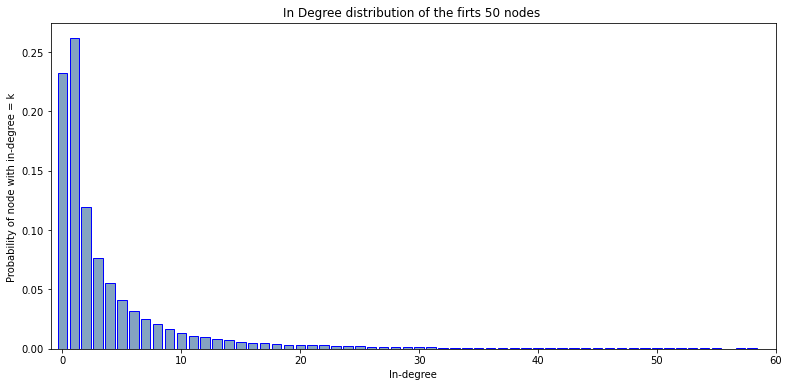

In [44]:
plt.figure(figsize=(13,6))
plt.bar(x_in , y_in,
        color=(0.2, 0.4, 0.6, 0.6),
        edgecolor='blue')
plt.title("In Degree distribution of the firts 50 nodes ")
plt.xlabel("In-degree")
plt.ylabel("Probability of node with in-degree = k ")
plt.xlim(-1, 60)
plt.show()

#### Out-Degree

In [45]:
out_deg_list = []
for key,items in tqdm(g.graph_d.items()):
    if isinstance(g.graph_d[key], list):
         out_deg_list.append(len(g.graph_d[key]))
    elif (isinstance(g.graph_d[key], int)): 
        out_deg_list.append(1) 
out_deg = Counter(sorted(out_deg_list))
x_out = list(out_deg.keys())
y_out =  np.array(list(out_deg.values()))/ len(g.vertices())

100%|██████████| 98343/98343 [00:00<00:00, 708258.32it/s]


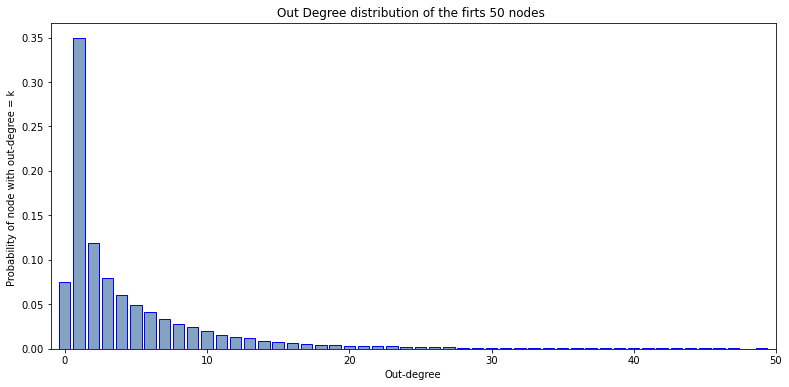

In [46]:
"""
ho troncato la distribuzione a 50 perchè andava troppo oltre e i valori erano tutti 0. 
"""
plt.figure(figsize=(13,6))
plt.bar(x_out, y_out,
        color=(0.2, 0.4, 0.6, 0.6),
        edgecolor='blue')
plt.title("Out Degree distribution of the firts 50 nodes ")
plt.xlabel("Out-degree")
plt.ylabel("Probability of node with out-degree = k ")
plt.xlim(-1, 50)
plt.show()